<a href="https://colab.research.google.com/github/rawatkhushi04/Sentiment-Analysis/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/reviews.csv')
data.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [ ]:
pd.unique(data['Label'])

array([5, 4, 3, 2, 1])

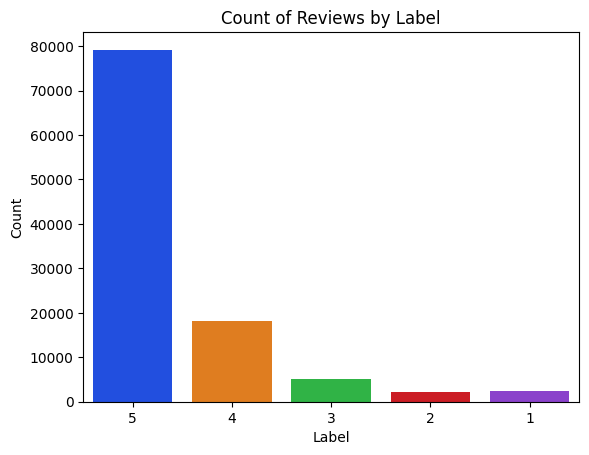

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom order for the labels
label_order = [5, 4, 3, 2, 1]

# Create the count plot with the specified order
sns.countplot(data=data, x='Label', order=label_order, palette='bright')

# Add title and labels
plt.title('Count of Reviews by Label')
plt.xlabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()



In [ ]:
pos_neg = []
for i in range(len(data['Label'])):
    if data['Label'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg


In [ ]:
neg = []
for i in range(len(data['Label'])):
    if data['Label'][i] <= 1:
        neg.append(1)
    else:
        neg.append(0)

data['Negative'] = neg


In [ ]:
from tqdm import tqdm


def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        # Removing punctuations, special symbols and numbers
        sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

        # Converting lowercase and removing stopwords
        preprocessed_text.append(' '.join(token.lower()
                                          for token in nltk.word_tokenize(sentence)
                                          if token.lower() not in stopwords.words('english')))

    return preprocessed_text

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import pandas as pd

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
preprocessed_review = preprocess_text(data['Review'].values)
data['Review'] = preprocessed_review



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 107018/107018 [06:09<00:00, 289.57it/s]


In [ ]:
data.head()

,Id,Review,Label,label,Negative
0,0,good interesting,5,1,0
1,1,class helpful currently im still learning clas...,5,1,0
2,2,likeprof tas helpful discussion among students...,5,1,0
3,3,easy follow includes lot basic important techn...,5,1,0
4,4,really nice teacheri could got point eazliy v,4,0,0


In [ ]:
data["label"].value_counts()

label
1    79173
0    27845
Name: count, dtype: int64

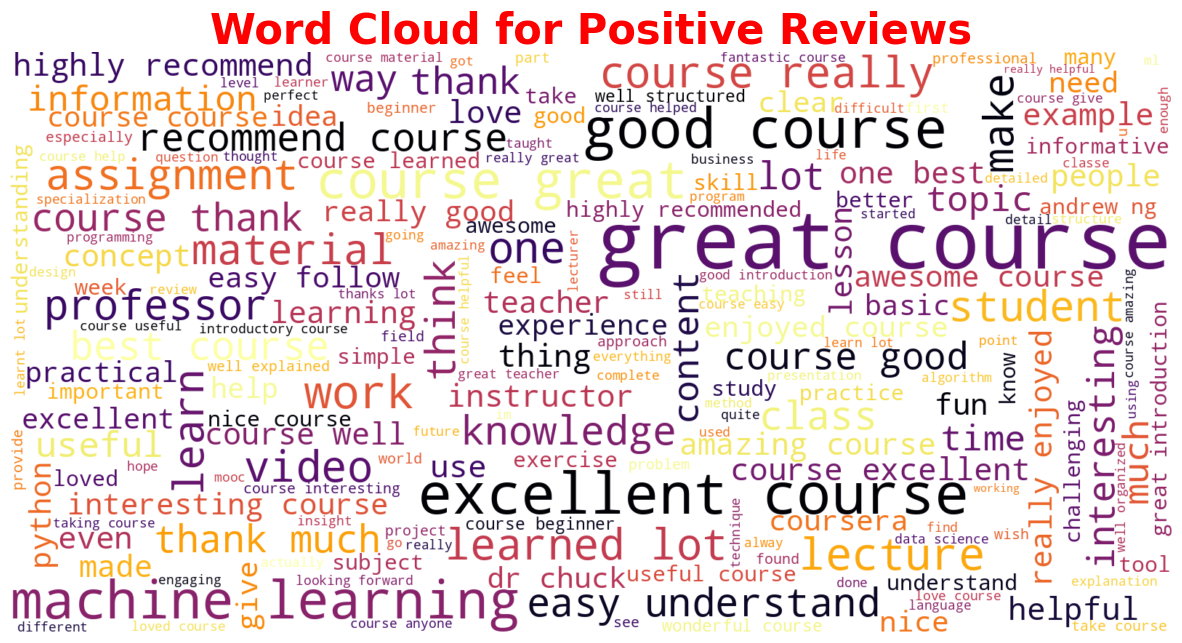

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Consolidate positive reviews
consolidated = ' '.join(word for word in data['Review'][data['label'] == 1].astype(str))

# Create the word cloud object with additional parameters
wordCloud = WordCloud(
    width=1600,
    height=800,

    max_font_size=110,
    background_color='white',
    colormap='inferno'
)

# Generate the word cloud
wordCloud.generate(consolidated)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')

# Add a title
plt.title('Word Cloud for Positive Reviews',fontweight='bold', fontsize=30,color='Red')

# Show the plot
plt.show()


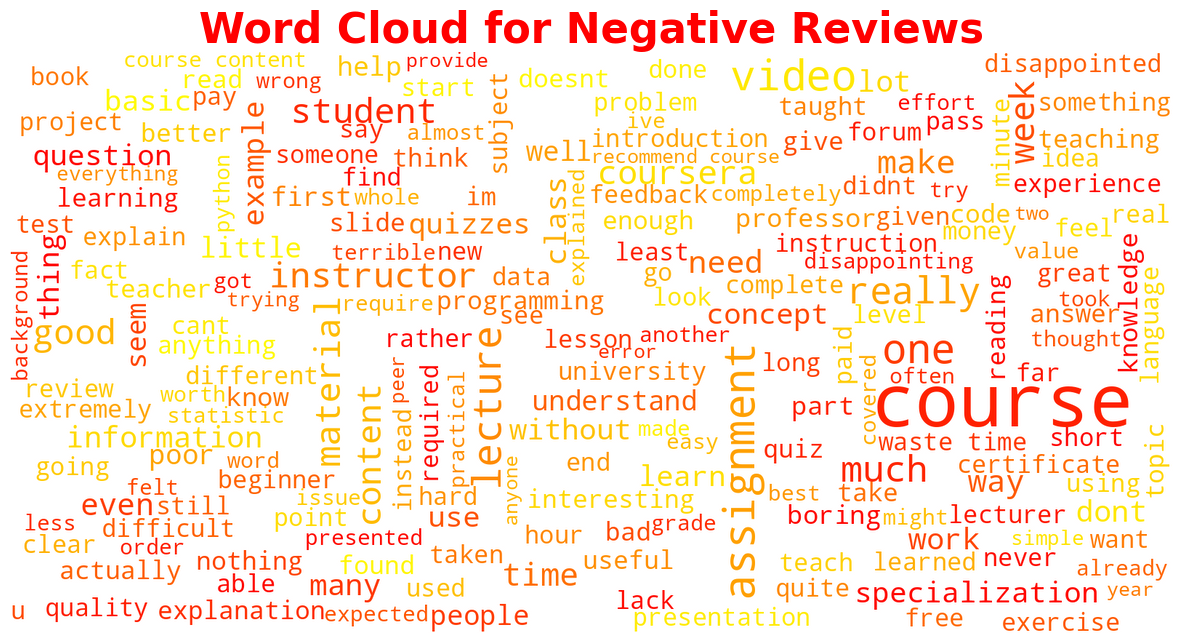

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Consolidate negative reviews
consolidated = '\n'.join(data['Review'][data['Negative'] == 1].astype(str))

# Create the word cloud object with additional parameters
wordCloud = WordCloud(
    width=1600,
    height=800,
    random_state=3,
    max_font_size=100,
    background_color='white',
    colormap='autumn'

)

# Generate the word cloud
wordCloud.generate(consolidated)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud, interpolation='Lanczos')
plt.axis('off')

# Add a title
plt.title('Word Cloud for Negative Reviews',fontweight='bold', fontsize=30,color='Red')

# Show the plot
plt.show()


In [ ]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                                                    test_size=0.33,
                                                    stratify=data['label'],
                                                    random_state = 42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Instantiate the model
model = MultinomialNB()

# Train the model
#X_train contains the reviews and y_train contains the corresponding labels
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
N_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {N_accuracy}')

Accuracy: 0.8217521803148714


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))

0.9838637694903908


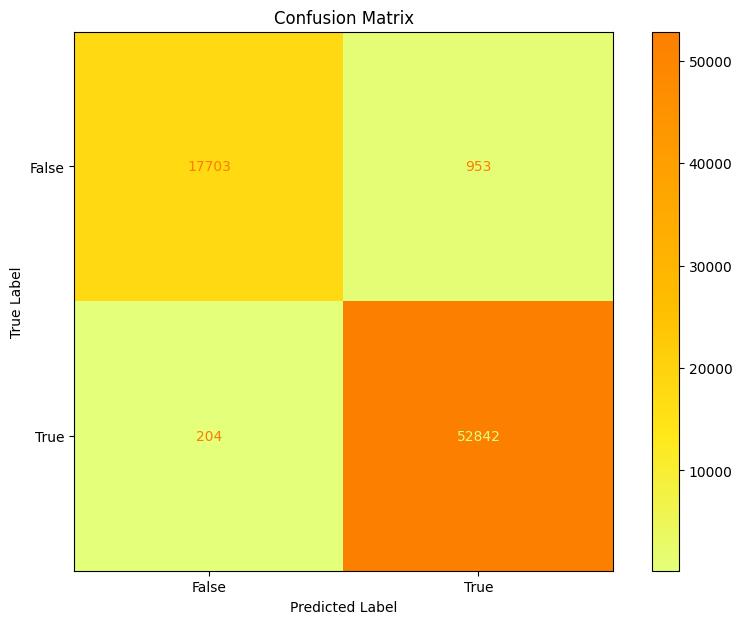

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_train, pred)

# Create the display object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 7))
cm_display.plot(ax=ax, cmap='Wistia')

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')



# Show the plot
plt.show()
